In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dwave_networkx as dnx

In [2]:
import networkx as nx
from tqdm import trange
from fairness_goodness_computation import *
import csv 

Data = open('soc-sign-bitcoinotc.csv', "r")
next(Data, None)  # skip the first line in the input file
Graphtype = nx.DiGraph()

G = nx.parse_edgelist(Data, delimiter=',', create_using=Graphtype, nodetype=int, data=(('Weight', int),('Timestamp', int)))

# Setting weights -1 to 1
weights = nx.get_edge_attributes(G,"Weight")
for key, val in weights.items():
    weights[key] = val/10
nx.set_edge_attributes(G, weights, "Weight")

In [3]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 5881
Number of edges: 35592
Average in degree:   6.0520
Average out degree:   6.0520


In [4]:
S = nx.Graph()
S.add_edge(1, 2, Weight=1)
S.add_edge(2, 3, Weight=1)
S.add_edge(3, 4, Weight=1)
S.add_edge(2, 4, Weight=1)
S.add_edge(1, 5, Weight=1)
S.add_edge(6, 7, Weight=1)
S.add_edge(7, 8, Weight=1)
S.add_edge(7, 9, Weight=1)
S.add_edge(6, 10, Weight=1)
S.add_edge(8, 11, Weight=1)
S.add_edge(10, 11, Weight=1)

S.add_edge(1, 6, Weight=-1)
S.add_edge(4, 9, Weight=-1)
S.add_edge(2, 11, Weight=-1)
S.add_edge(5, 5, Weight=-1)
S.add_edge(3, 10, Weight=-1)
S.add_edge(4, 7, Weight=-1)


In [5]:
H = S

In [6]:
[len(c) for c in sorted(nx.connected_components(G.to_undirected()), key=len, reverse=True)]

[5875, 2, 2, 2]

In [18]:
nodes = []
WW = nx.get_edge_attributes(G,"Weight")
count = 0
for i in (G.edges):
    if(WW[i] < 0):
        nodes.append(i[0])
        nodes.append(i[1])
        count+=2
    if(count == 40):
        break    

In [19]:
H = G.to_undirected().subgraph(nodes)
nx.info(H)

'Name: \nType: Graph\nNumber of nodes: 20\nNumber of edges: 43\nAverage degree:   4.3000'

In [20]:
np.unique((np.array(list(nx.get_edge_attributes(H,"Weight").values()) ) > 0).astype(int), return_counts = 1)

(array([0, 1]), array([17, 26], dtype=int64))

In [21]:
A = nx.adjacency_matrix(H, weight = "Weight")

In [22]:
print('Adjacency matrix:')
A.todense()

Adjacency matrix:


matrix([[ 0. ,  0.8,  0.1,  1. ,  0.8,  0.4,  0.8, -0.5, -1. ,  0. ,
         -1. ,  0. , -0.5,  0. ,  0. ,  0. ,  0.2,  0.9, -1. ,  0.2],
        [ 0.8,  0. ,  0. ,  0.6,  0.5,  0. ,  0.2,  0. ,  0. ,  0. ,
          0. ,  0. ,  0.8,  0.3,  0. , -0.1,  0. ,  0. ,  0. ,  0. ],
        [ 0.1,  0. ,  0. ,  0. ,  0. ,  0. , -0.1,  0. ,  0. ,  0. ,
          0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. , -0.1],
        [ 1. ,  0.6,  0. ,  0. ,  0.5,  0. ,  0.8,  0. ,  0. ,  0.1,
          0. ,  0. ,  0.7, -1. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. ],
        [ 0.8,  0.5,  0. ,  0.5,  0. ,  0. , -0.1,  0. ,  0. ,  0. ,
          0. , -1. ,  0. ,  0. ,  0. ,  0. ,  0. , -1. ,  0. ,  0. ],
        [ 0.4,  0. ,  0. ,  0. ,  0. ,  0. ,  0.5,  0. ,  0. ,  0. ,
         -1. ,  0. ,  0. , -1. ,  0. ,  0. , -1. ,  0.5,  0. ,  0.1],
        [ 0.8,  0.2, -0.1,  0.8, -0.1,  0.5,  0. ,  0. ,  0. ,  0. ,
          0. ,  0. ,  0. ,  0.1,  0. ,  0. , -0.5,  0. ,  0. ,  0.1],
        [-0.5,  0. ,  0. , 

In [23]:
D = np.diag(np.sum(np.abs(np.array(A.todense())), axis=1))
print('Degree matrix:')
print(D)

Degree matrix:
[[9.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  3.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.3 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  5.7 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  0.  3.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  0.  0.  4.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  0.  0.  0.  3.2 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  1.1 0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.
  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0. 

In [24]:
L = D - A
D_inv_sqrt = np.linalg.inv(np.sqrt(D))
L = np.dot(D_inv_sqrt, L).dot(D_inv_sqrt)
L

matrix([[ 1.        , -0.1451908 , -0.06019293, -0.13809204, -0.13355611,
         -0.06216699, -0.14744196,  0.2331262 ,  0.31434731,  0.        ,
          0.2331262 ,  0.        ,  0.10425721,  0.        ,  0.        ,
          0.        , -0.05057217, -0.19153272,  0.31434731, -0.08512565],
        [-0.1451908 ,  1.        ,  0.        , -0.13834289, -0.13937367,
          0.        , -0.06154575,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        , -0.27852425, -0.10660036,  0.        ,
          0.06579517,  0.        ,  0.        ,  0.        ,  0.        ],
        [-0.06019293,  0.        ,  1.        ,  0.        ,  0.        ,
          0.        ,  0.10206207,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.23570226],
        [-0.13809204, -0.13834289,  0.        ,  1.        , -0.10604746,
          0.        , -0.18731716, 

In [53]:
k = 4

In [54]:
e, v = np.linalg.eig(L)
mapp = dict(zip(e,v))
minns = sorted(e[e > 0])[:k]
SMALLEST = [mapp[l].T for l in minns]
U = np.real(np.array(SMALLEST).reshape(k,len(H.nodes)).T)

In [55]:
from sklearn.cluster import SpectralClustering, KMeans
print(U.shape)
km = KMeans(n_clusters=k)
km.fit(U)
km.labels_

(20, 4)


array([2, 2, 3, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [46]:
from sklearn.decomposition import PCA
X = U
pca = PCA(n_components=2)
U = pca.fit_transform(X)
U

array([[ 7.54999999e-03, -5.52815026e-02],
       [-4.74141588e-01, -3.80004547e-01],
       [-4.10909973e-02,  3.22969694e-01],
       [ 6.83640624e-01,  9.35738719e-02],
       [ 1.28721212e-01, -2.67799759e-01],
       [-3.02500128e-02,  5.65528596e-01],
       [-1.15238713e-01, -3.78590649e-01],
       [-3.79886217e-01,  3.39484385e-01],
       [ 2.78286860e-01, -1.22797510e-01],
       [-1.24069424e-01,  9.67620831e-02],
       [-1.31478259e-01,  1.23898214e-01],
       [-5.97548000e-03, -3.09414651e-02],
       [ 5.15118359e-03, -3.43526429e-03],
       [ 1.38953245e-01, -2.09807486e-01],
       [ 2.32828077e-02, -2.77459059e-03],
       [ 6.05269097e-03, -3.04697089e-02],
       [ 3.04920676e-02, -6.03143605e-02],
       [-2.77555756e-15,  7.18175519e-16],
       [-2.95596880e-15,  1.26981758e-15],
       [-3.16066617e-15,  1.23165367e-15]])

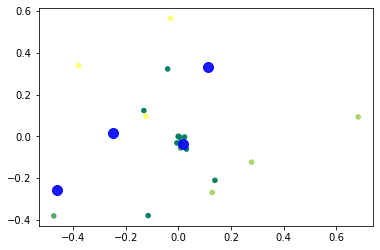

In [47]:
plt.scatter(U[:, 0], U[:, 1], c=km.labels_, s=20, cmap='summer')
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.9);
plt.show()

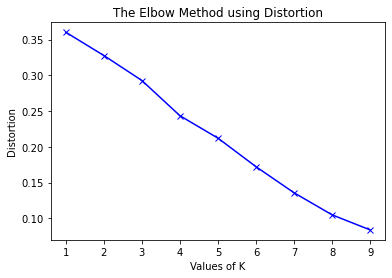

In [61]:
from scipy.spatial.distance import cdist
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k, init='k-means++').fit(U)
	kmeanModel.fit(U)

	distortions.append(sum(np.min(cdist(U, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / U.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(U, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / U.shape[0]
	mapping2[k] = kmeanModel.inertia_
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

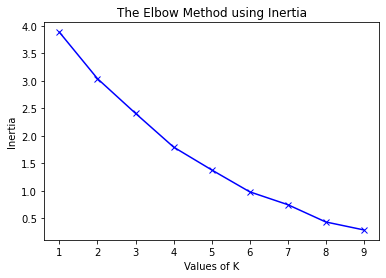

In [62]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [56]:
from collections import defaultdict
dic = defaultdict(list)
for i in range(len(list(H.nodes))):
    dic[km.labels_[i]].append(list(H.nodes)[i])

In [454]:
# import numpy as np
# pos = nx.circular_layout(H)
# r = 7
# radii = list(range(r*1, r*len(dic.keys()) + r, r))

# for ea in pos.keys():
#     new_r = 1
#     for i in range(len(dic.keys())):
#         if(ea in dic[i]):
#             new_r = radii[i]
#     pos[ea] *= new_r

In [57]:
[len(dic[i]) for i in dic.keys()]
dic

defaultdict(list,
            {2: [1, 2],
             3: [1281],
             0: [4,
              6,
              13,
              2471,
              1331,
              62,
              832,
              713,
              204,
              1753,
              1383,
              2410,
              1771],
             1: [905, 672, 423, 2096]})

In [58]:
colos = list((np.array(list(nx.get_edge_attributes(H,"Weight").values()) ) > 0).astype(int))

In [32]:
# --- Begin_myhack ---
# All this code should replace original `pos=nx.spring_layout(graph)`
import numpy as np
pos = nx.circular_layout(H)   # replaces your original pos=...
# prep center points (along circle perimeter) for the clusters
angs = np.linspace(0, 2*np.pi, 1+len(dic.keys()))
repos = []
rad = 3.5     # radius of circle
for ea in angs:
    if ea > 0:
        #print(rad*np.cos(ea), rad*np.sin(ea))  # location of each cluster
        repos.append(np.array([rad*np.cos(ea), rad*np.sin(ea)]))
for ea in pos.keys():
    posx = 0
    for i in dic.keys():
        if(ea in dic[i]):
            posx = i
    #print(ea, pos[ea], pos[ea]+repos[posx], color, posx)
    pos[ea] += repos[posx]
# --- End_myhack ---

In [59]:
pos = dict(zip(H.nodes,U[:,:2]))
pos

{1: array([-0.45455027, -0.38913181]),
 2: array([-0.46619397, -0.12052836]),
 1281: array([ 0.3738282 , -0.53256688]),
 4: array([ 0.04039284, -0.23201296]),
 6: array([-0.45501272,  0.31138565]),
 905: array([0.24863626, 0.17264881]),
 13: array([0.0635318 , 0.07274973]),
 672: array([0.1195155 , 0.41951473]),
 2471: array([-0.32867641, -0.03639263]),
 423: array([-0.02775796,  0.39823409]),
 2096: array([0.0047003 , 0.09937676]),
 1331: array([0.02536124, 0.02104129]),
 62: array([-0.10314151,  0.01908712]),
 832: array([-0.15136366, -0.12908131]),
 713: array([0.040909  , 0.00904389]),
 204: array([-0.01204405,  0.03458327]),
 1753: array([-0.05157135,  0.00083576]),
 1383: array([1.36919229e-16, 3.68130666e-16]),
 2410: array([8.24657138e-16, 2.66589017e-16]),
 1771: array([7.43786430e-16, 5.16057499e-16])}

{1: Text(-0.4545502709361727, -0.389131808349132, '1'),
 2: Text(-0.466193972419596, -0.12052836060496391, '2'),
 1281: Text(0.3738282035273042, -0.5325668796029084, '1281'),
 4: Text(0.040392840236110644, -0.2320129579718745, '4'),
 6: Text(-0.45501272239275037, 0.3113856495704972, '6'),
 905: Text(0.24863626351063026, 0.1726488083306445, '905'),
 13: Text(0.06353179879063446, 0.07274972669211813, '13'),
 672: Text(0.11951549631111562, 0.41951473407983436, '672'),
 2471: Text(-0.3286764085559939, -0.03639262980885397, '2471'),
 423: Text(-0.02775796355063309, 0.3982340923552843, '423'),
 2096: Text(0.004700300504268421, 0.09937676330975763, '2096'),
 1331: Text(0.02536124317611034, 0.021041287685995624, '1331'),
 62: Text(-0.10314151446754867, 0.01908712013586658, '62'),
 832: Text(-0.1513636631121016, -0.12908130701243725, '832'),
 713: Text(0.04090899845547247, 0.009043890190512412, '713'),
 204: Text(-0.012044054983032649, 0.034583267319723665, '204'),
 1753: Text(-0.05157134954983

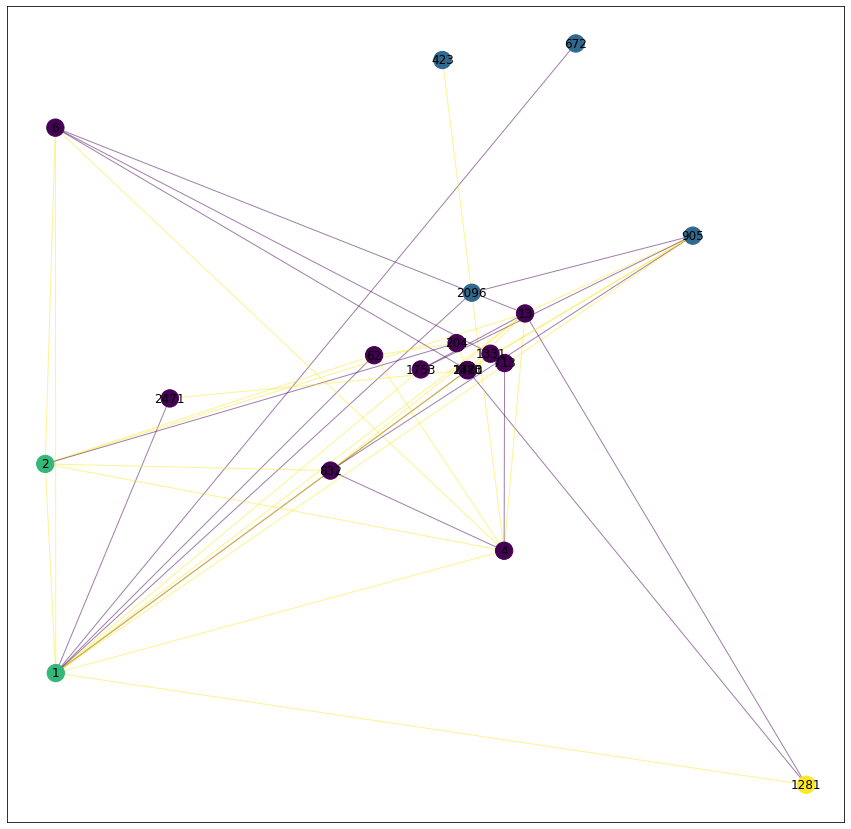

In [60]:
plt.figure(figsize = (15,15))
# plt.xlim(-(r*len(dic.keys()) + r),r*len(dic.keys()) + r + 10)
# plt.ylim(-(r*len(dic.keys()) + r),r*len(dic.keys()) + r + 10)
nx.draw_networkx_nodes(H, pos = pos, node_color = list(km.labels_))
nx.draw_networkx_edges(H, pos = pos, width=1.0, alpha=0.5, edge_color = colos)# edge_cmap = plt.cm.RdBu
# nx.draw_networkx_labels(H, labels = dict(zip(list(H.nodes), km.labels_)), pos = pos)
nx.draw_networkx_labels(H, labels = dict(zip(list(H.nodes), list(H.nodes))), pos = pos)

### STRUCTURAL IMBALANCE!

In [368]:
import dimod
WW = nx.get_edge_attributes(H,"Weight")
nx.set_edge_attributes(H, WW, "sign")
sampler = dimod.RandomSampler()
f, c = dnx.structural_imbalance(H, sampler)

In [369]:
dic = defaultdict(list)
for i in list(H.nodes):
    dic[c[i]].append(i)

In [370]:
# --- Begin_myhack ---
# All this code should replace original `pos=nx.spring_layout(graph)`
import numpy as np
pos = nx.circular_layout(H)   # replaces your original pos=...
# prep center points (along circle perimeter) for the clusters
angs = np.linspace(0, 2*np.pi, 1+len(dic.keys()))
repos = []
rad = 3.5     # radius of circle
for ea in angs:
    if ea > 0:
        #print(rad*np.cos(ea), rad*np.sin(ea))  # location of each cluster
        repos.append(np.array([rad*np.cos(ea), rad*np.sin(ea)]))
for ea in pos.keys():
    posx = 0
    for i in range(len(dic.keys())):
        if(ea in dic[i]):
            posx = i
    #print(ea, pos[ea], pos[ea]+repos[posx], color, posx)
    pos[ea] += repos[posx]
# --- End_myhack ---

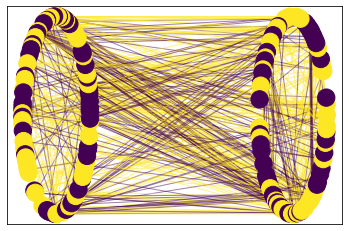

In [371]:
nx.draw_networkx_nodes(H, pos = pos, node_color = list(c.values()))
nx.draw_networkx_edges(H, pos = pos, width=1.0, alpha=0.5, edge_color = colos) # , edge_cmap = plt.cm.RdBu
# nx.draw_networkx_labels(H, labels = dict(zip(list(H.nodes), km.labels_)), pos = pos)